# Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
import os
import matplotlib.image as mpimg
import datetime

# Setting up report period

In [213]:
year_= 1981 # The year of the report time
quarter = 1 # The quarter of the report time
start_date = str(year_) + '-01-01' # The start date of the year
last_year = year_-1 # is used for the calculation of last quarter values of the last year
#base_date = "1980-12-31"

#quarter_tuples = [('1','1981-03-01'),('2','1981-06-01')]

# Table titles based on quarters

In [214]:
if quarter == 1:
    table_index = ['January','February','March']
    quarter_start = str(year_) + '-01-01'
    end_date = str(year_) + '-03-31'
    last_month = 3
    quarter_tuples = [('1',str(year_) + '-03-01')] #('4',str(last_year) + '-12-01'),
elif quarter == 2:
    table_index = ['January','February','March','April','May','June']
    quarter_start = str(year_) + '-04-01'
    end_date = str(year_) + '-06-30'
    last_month = 6
    quarter_tuples = [('1',str(year_) + '-03-01'),('2',str(year_) + '-06-01')]
elif quarter == 3:
    table_index = ['January','February','March','April','May','June','July','August','September']
    quarter_start = str(year_) + '-07-01'
    end_date = str(year_) + '-09-30'
    last_month = 9
    quarter_tuples = [('1',str(year_) + '-03-01'),('2',str(year_) + '-06-01'),('3',str(year_) + '-09-01')]
else:
    table_index = ['January','February','March','April','May','June','July','August','September','October','November','December']
    quarter_start = str(year_) + '-10-01'
    end_date = str(year_) + '-12-31'
    last_month = 12
    quarter_tuples = [('1',str(year_) + '-03-01'),('2',str(year_) + '-06-01'),('3',str(year_) + '-09-01'),('4',str(year_) + '-12-01')]

# Reading .csv files
u : Oil Production, 
cu: Gas Production, 
ce: Gas Injection,
se: Water Injection,
r: Recycle,
a: Intervention,
urt: Monthly Production Report,
tah: Monthly Prediction Report


In [17]:
#,parse_dates=[1],dayfirst=True

dfu = pd.read_csv('X_Oil_Production.csv',sep =';', encoding='latin1',parse_dates = [1])
dfcu = pd.read_csv('X_Gas_Production.csv',sep =';', encoding='latin1',parse_dates = [1])
dfce = pd.read_csv('X_Gas_Injection.csv',sep =';', encoding='latin1',parse_dates = [1])
dfse = pd.read_csv('X_Water_Injection.csv',sep =';', encoding='latin1',parse_dates = [1])
df_Header = pd.read_csv("X_HeaderID.csv",sep = ';',encoding = 'latin1')
dfa = pd.read_csv('X_Intervention.csv',sep = ';', encoding='latin1',parse_dates = [1],dayfirst = True)
urt = pd.read_csv('X_Monthly_Production_Report.csv',sep = ';', encoding='latin1',parse_dates = [0],dayfirst = True)
tah = pd.read_csv("X_Production_Prediction.csv",sep =';' , encoding='latin1',parse_dates = [0])
df_shut_in = pd.read_csv('X_Shut_In_Wells.csv',sep = ';')

dfu['month'] = dfu.Date_.dt.month;
dfu['year'] = dfu.Date_.dt.year;
dfu['days_in_month'] = dfu.Date_.dt.days_in_month
dfu['quarter'] = dfu.Date_.dt.quarter

dfcu['month'] = dfcu.Date_.dt.month;
dfcu['year'] = dfcu.Date_.dt.year;
dfcu['quarter'] = dfcu.Date_.dt.quarter

dfce['month'] = dfce.Date_.dt.month;
dfce['year'] = dfce.Date_.dt.year;
dfce['quarter'] = dfce.Date_.dt.quarter

dfse['month'] = dfse.Date_.dt.month;
dfse['year'] = dfse.Date_.dt.year;
dfse['quarter'] = dfse.Date_.dt.quarter
dfse = dfse[dfse.Monthly_Water_Injection_bbl > 0]

dfa.Date_ = pd.to_datetime(dfa.Date_, dayfirst = True)
dfa['month'] = dfa.Date_.dt.month;
dfa['year'] = dfa.Date_.dt.year;

#urt.Date_ = pd.to_datetime(urt.Date_, dayfirst = True)
urt['month'] = urt.Date_.dt.month;
urt['year'] = urt.Date_.dt.year;

tah['month'] = tah.Date_.dt.month;
tah['year'] = tah.Date_.dt.year;

C:\Users\tinceisci\AppData\Local\Temp\ipykernel_1884500\2588511652.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dfa = pd.read_csv('X_Intervention.csv',sep = ';', encoding='latin1',parse_dates = [1],dayfirst = True)
C:\Users\tinceisci\AppData\Local\Temp\ipykernel_1884500\2588511652.py:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  urt = pd.read_csv('X_Monthly_Production_Report.csv',sep = ';', encoding='latin1',parse_dates = [0],dayfirst = True)




# Sums by Quarter



In [216]:
donem_oil = dfu[dfu.Date_.between(quarter_start,end_date)].Monthly_Oil_Production_bbl.sum()
donem_su = dfu[dfu.Date_.between(quarter_start,end_date)].Monthly_Water_Production_bbl.sum()
donem_CO2 = dfcu[dfcu.Date_.between(quarter_start,end_date)].Monthly_Gas_Production_Mscf.sum()/1000
donem_CO2enj = np.round(dfce[dfce.Date_.between(quarter_start,end_date)].Monthly_Gas_Injection_MMscf.sum(),3)
donem_suenj = dfse[dfse.Date_.between(quarter_start,end_date)].Monthly_Water_Injection_bbl.sum()



# Cumulatives



In [217]:
cum_oil = dfu[dfu.Date_ <= end_date].Monthly_Oil_Production_bbl.sum()
cum_su = dfu[dfu.Date_ <= end_date].Monthly_Water_Production_bbl.sum()
cum_CO2 = round(dfcu[dfcu.Date_ <= end_date].Monthly_Gas_Production_Mscf.sum()/1e3,2)
cum_CO2enj = round(dfce[dfce.Date_ <= end_date].Monthly_Gas_Injection_MMscf.sum(),2)
cum_suenj = dfse[dfse.Date_ <= end_date].Monthly_Water_Injection_bbl.sum()

In [218]:
print(f"Cumulative Oil Production       : {cum_oil} bbl")
print(f"Cumulative Water Production     : {cum_su} bbl")
print(f"Cumulative Gas Production       : {cum_CO2} MMscf")
print(f"Cumulative Gas Injection        : {cum_CO2enj} MMscf")
print(f"Cumulative Water Injection      : {cum_suenj} bbl")


Cumulative Oil Production       : 110344889 bbl
Cumulative Water Production     : 18531851 bbl
Cumulative Gas Production       : 312955.3 MMscf
Cumulative Gas Injection        : 377921.15 MMscf
Cumulative Water Injection      : 12604539 bbl




# Active Well Count




In [219]:
UKS = dfu[dfu.Date_.between(start_date,end_date)].groupby('month')['Monthly_Oil_Production_bbl'].count()
CEKS = dfce[dfce.Date_.between(start_date,end_date)].groupby('month')['Monthly_Gas_Injection_MMscf'].count()
SUEKS = dfse[dfse.Date_.between(start_date,end_date)].groupby('month')['Monthly_Water_Injection_bbl'].count()
Active_Well_Counts = pd.merge(pd.merge(UKS,CEKS,how='outer',on='month'),SUEKS,how='outer',on='month');
Active_Well_Counts.columns = ['Production_Well_Count','Gas_Injection_Well_Count','Water_Injection_Well_Count']

# Well count for the last month

In [220]:
UKS_lm = dfu[(dfu.year == year_) & (dfu.month == last_month)]['Well'].value_counts().sum()
GEKS_lm = dfce[(dfce.year == year_) & (dfce.month == last_month)]['Well'].value_counts().sum()
SUEKS_lm = dfse[(dfse.year == year_) & (dfse.month == last_month)]['Well'].value_counts().sum()



# Monthly Productions



In [221]:
O_W_Production = dfu[dfu.Date_.between(start_date,end_date)].groupby('month')[['Monthly_Oil_Production_bbl','Monthly_Water_Production_bbl']].sum();
Gas_Production = np.round(dfcu[dfcu.Date_.between(start_date,end_date)].groupby('month')['Monthly_Gas_Production_Mscf'].sum()/1000,2)
Prods = pd.merge(O_W_Production,Gas_Production,how='outer',on='month')
Prods.columns = ['Oil_Production_bbl', 'Water_Production_bbl','Gas_Production_MMscf']
SubSu = dfse[dfse.Date_.between(start_date,end_date)].groupby('month')['Monthly_Water_Injection_bbl'].sum()



# Gas Injection Total



In [222]:
Recycle = urt[urt.Date_.between(start_date,end_date)].groupby('month')[['Gas_Field','Recycle_F2','Recycle_F6']].sum()
Recycle['Total_Gas_Injection_MMscf'] = Recycle.Gas_Field + Recycle.Recycle_F2 + Recycle.Recycle_F6

# Well Workovers

In [223]:
WO=dfa[(dfa.Date_.between(start_date,end_date))  & (dfa['Rig_Type'].isin(['RP','SV','ID']))];
ID = WO[WO.Rig_Type == 'ID'].groupby('month')['Rig_Type'].count();
RP = WO[WO.Rig_Type.isin(['RP','SV'])].groupby('month')['Rig_Type'].count();

# KPI Table

In [224]:
Sub1 = pd.merge(Active_Well_Counts,Prods,how='inner',on='month')
Sub2 = pd.merge(Sub1,Recycle,how='inner',on='month')
Sub3 = pd.merge(Sub2,SubSu,how='outer',on='month')
Sub4 = pd.merge(left = ID,right = RP,how = 'inner',on = 'month', suffixes = ('_ID', '_RP'));
KPIs = pd.merge(left = Sub3,right = Sub4,how = 'inner',on = 'month');

In [225]:
KPIs.index = table_index
KPIs

,Production_Well_Count,Gas_Injection_Well_Count,Water_Injection_Well_Count,Oil_Production_bbl,Water_Production_bbl,Gas_Production_MMscf,Gas_Field,Recycle_F2,Recycle_F6,Total_Gas_Injection_MMscf,Monthly_Water_Injection_bbl,Rig_Type_ID,Rig_Type_RP
January,153,36,1,80712,25346,459.90,200.2,332.5,274.5,807.2,6533,25,205
February,157,36,1,77216,28924,410.26,199.5,323.6,221.7,744.8,5152,16,194
March,158,37,1,86160,31346,468.70,206.0,400.7,206.2,812.9,5246,15,162


# Creating KPI table by quarter

In [226]:
#KPIs.to_excel('KPI_Table' + 'Quarter #' + str(quarter) + '.xlsx')

# Water Cut Map

In [227]:
def wc_division(wc):
    if wc <= 20:
        return '<=20%'
    elif wc > 20 and wc<= 40:
        return '20%-40%'
    elif wc > 40 and wc<= 60:
        return '40%-60%'
    elif wc > 60 and wc<= 80:
        return '60%-80%'
    elif wc > 80 and wc<= 99:
        return '80%-99%'
    else:
        return '100%'

In [228]:
dfu["WC_Division"] = np.vectorize(wc_division)(dfu.WC)

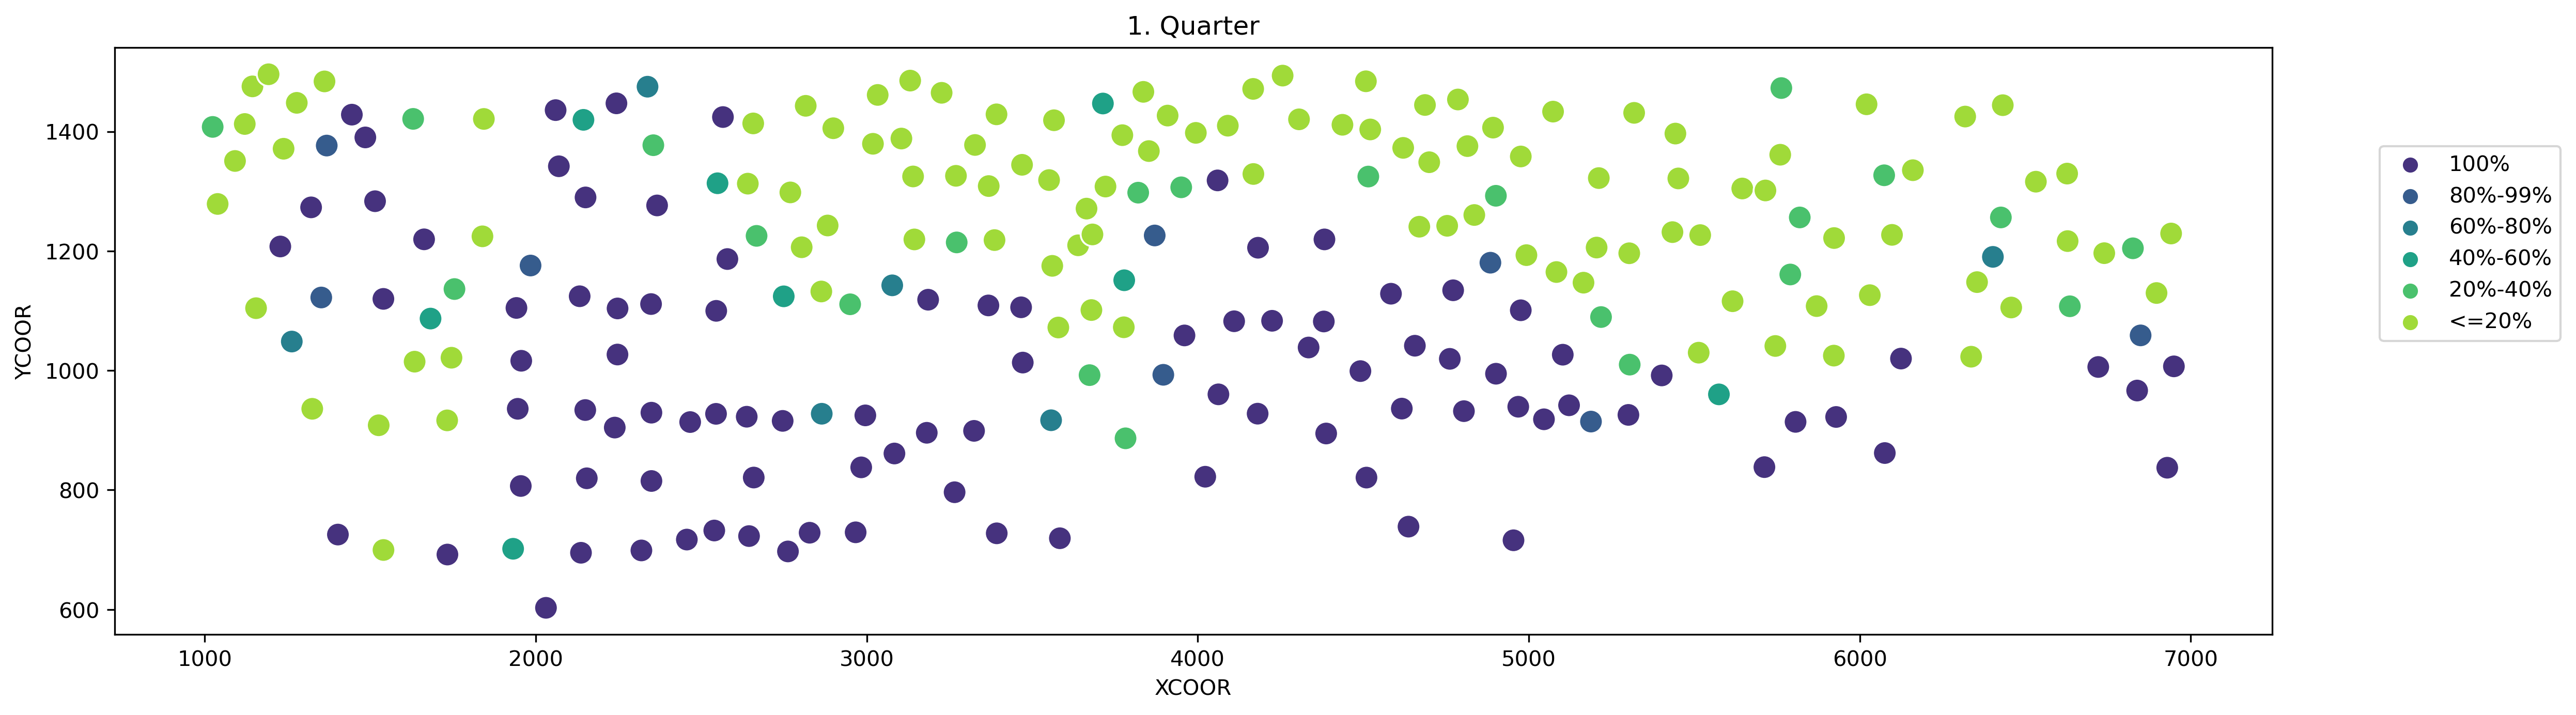

In [229]:
WC_Division = dfu[(dfu.year == year_) & (dfu.month == last_month)][["Well","WC_Division"]]
WC_Son = pd.concat([WC_Division,df_shut_in])
SubWC = pd.merge(df_Header[["Well","XCOOR","YCOOR"]],WC_Son,how='inner',on='Well')


fig, ax = plt.subplots(figsize=(17.96,4.918),dpi=300)
ax.set_title(str(quarter)+'. Quarter')
sns.scatterplot(
                data = SubWC, 
                x='XCOOR',
                y='YCOOR',
                hue='WC_Division',
                hue_order = ("100%",'80%-99%','60%-80%','40%-60%','20%-40%',"<=20%"),
                s=120,
                palette = 'viridis'
                )
plt.legend(loc = (1.05,0.5))

# EOR Regions Map

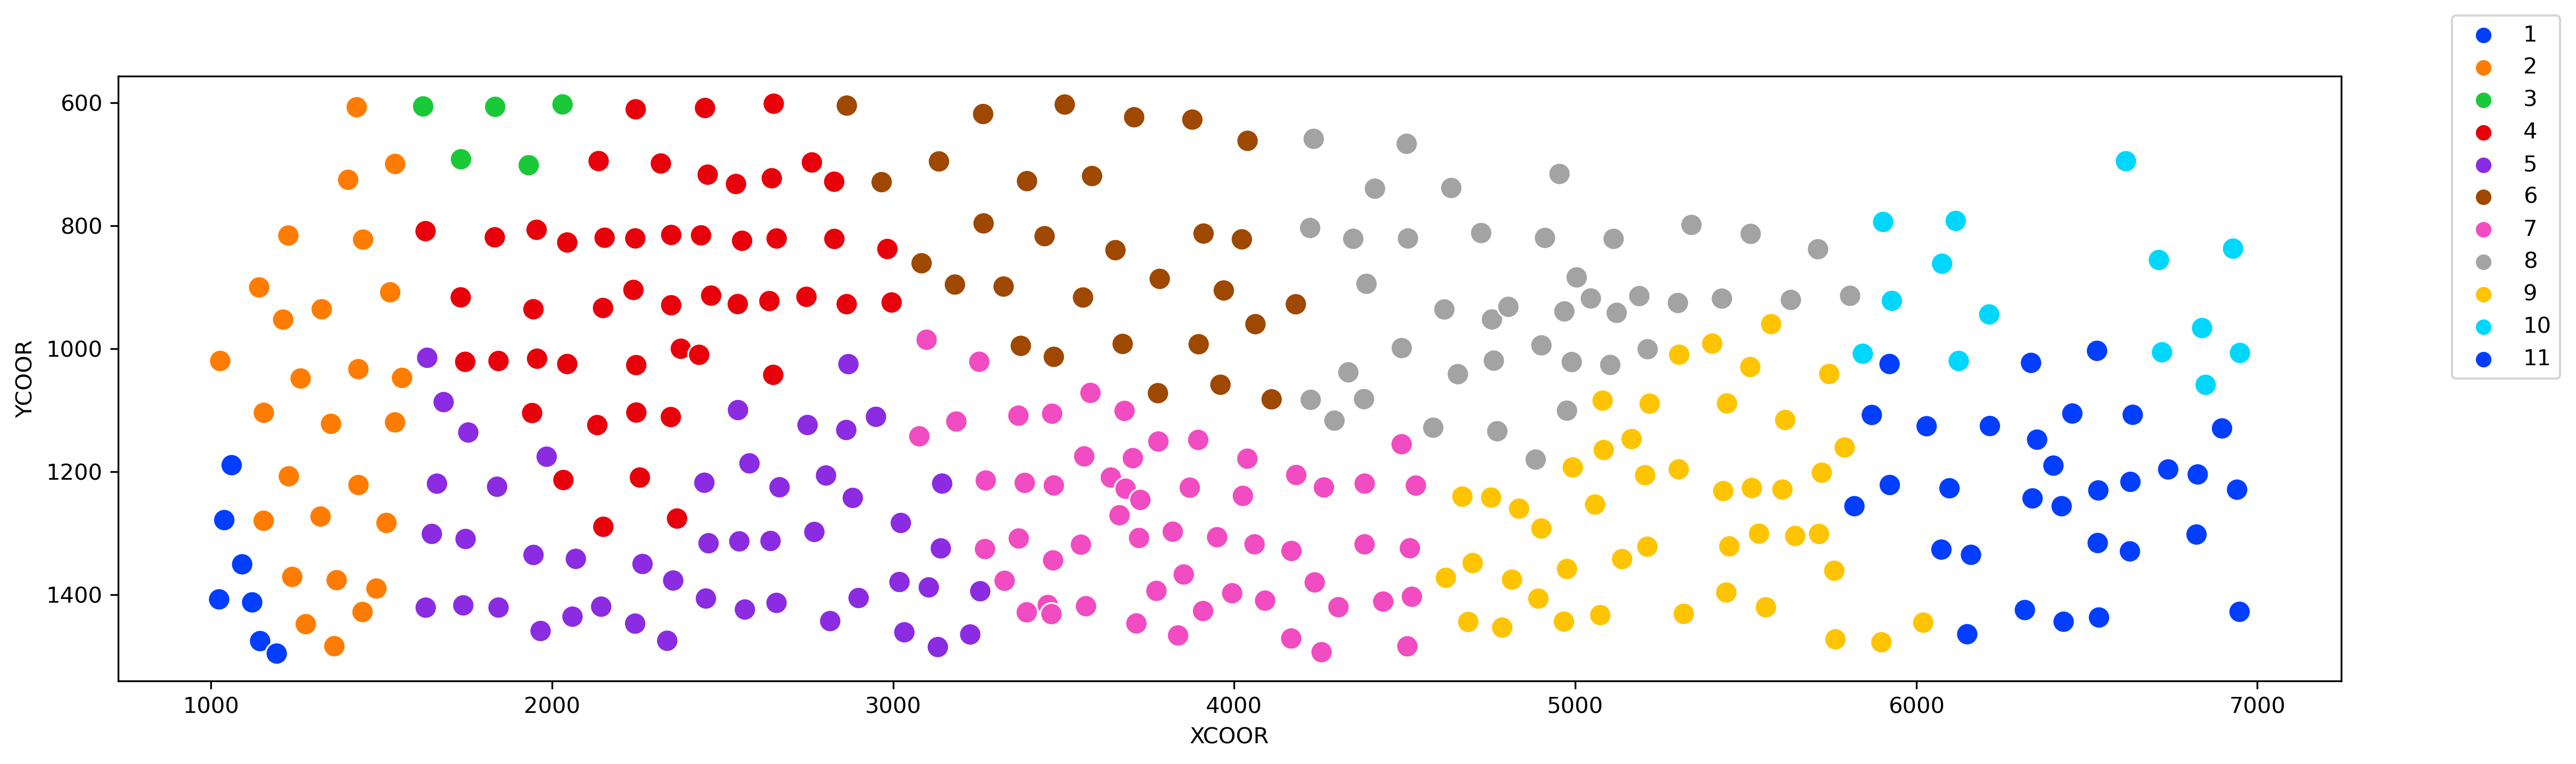

In [230]:
fig, ax = plt.subplots(figsize=(17.96,4.918),dpi=300)
sns.scatterplot(
                data = df_Header, 
                x='XCOOR',
                y='YCOOR',
                hue='EOR_Region',
                hue_order = (1,2,3,4,5,6,7,8,9,10,11),
                s=100,
                palette = 'bright'
               )
ax.invert_yaxis()
plt.legend(loc = (1.05,0.5))

# Monthly Oil Production by EOR_Regions

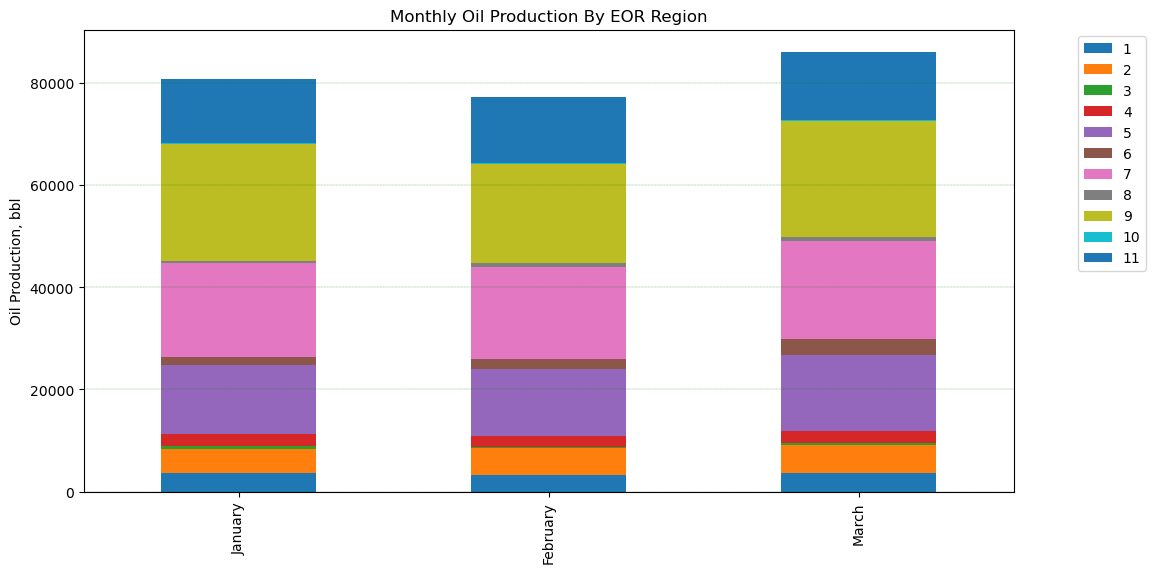

In [231]:
pu = pd.merge(df_Header,dfu[dfu.Date_.between(start_date,end_date)],how='inner',on='Well')
pu = pu[["EOR_Region","Date_","Monthly_Oil_Production_bbl"]]
pu = pd.pivot_table(pu[pu.Date_ >= start_date],index = "Date_",columns = "EOR_Region", aggfunc = 'sum')
pu.columns = pu.columns.droplevel(0)
pu.index = table_index
pu.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Monthly Oil Production By EOR Region')
plt.ylabel('Oil Production, bbl')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.2)
plt.legend(bbox_to_anchor=(1.15, 1))

# Monthly Water Production by EOR_Regions

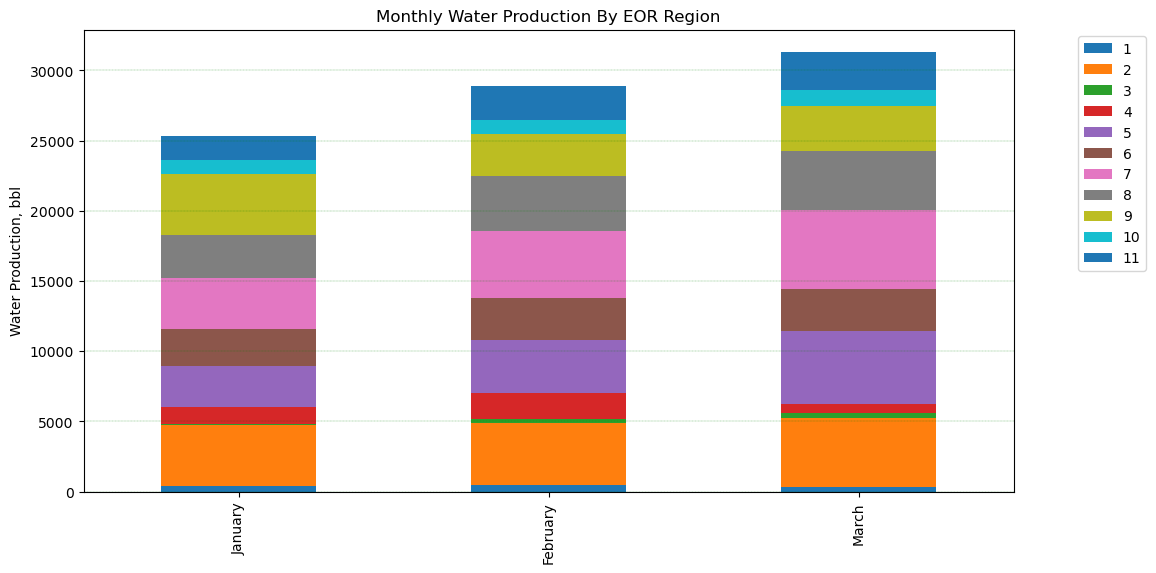

In [232]:
su = pd.merge(df_Header,dfu[dfu.Date_.between(start_date,end_date)],how='inner',on='Well')
su = su[["EOR_Region","Date_","Monthly_Water_Production_bbl"]]
su = pd.pivot_table(su[su.Date_>=start_date],index = "Date_",columns = "EOR_Region", aggfunc = 'sum')
su.columns = su.columns.droplevel(0)
su.index = table_index
su.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Monthly Water Production By EOR Region')
plt.ylabel('Water Production, bbl')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.2)
plt.legend(bbox_to_anchor=(1.15, 1))

# Monthly Gas Production by EOR_Regions

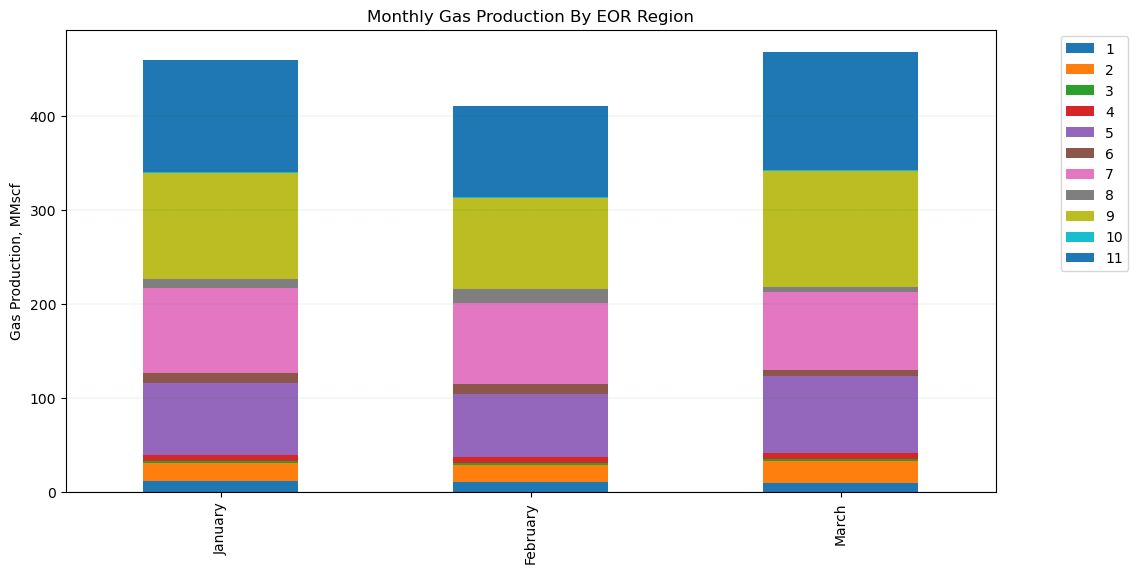

In [233]:
cu = pd.merge(df_Header,dfcu[dfcu.Date_.between(start_date,end_date)],how='inner',on='Well')
cu["Monthly_Gas_Uretimi_MMscf"] = cu.Monthly_Gas_Production_Mscf / 1000
cu = cu[["EOR_Region","Date_","Monthly_Gas_Uretimi_MMscf"]]
cu = pd.pivot_table(cu[cu.Date_>=start_date],index = "Date_",columns = "EOR_Region", aggfunc = 'sum')
cu.columns = cu.columns.droplevel(0)
cu.index = table_index
cu.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Monthly Gas Production By EOR Region')
plt.ylabel('Gas Production, MMscf')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.1)
plt.legend(bbox_to_anchor=(1.15, 1))

# Monthly Gas Injection by EOR_Regions

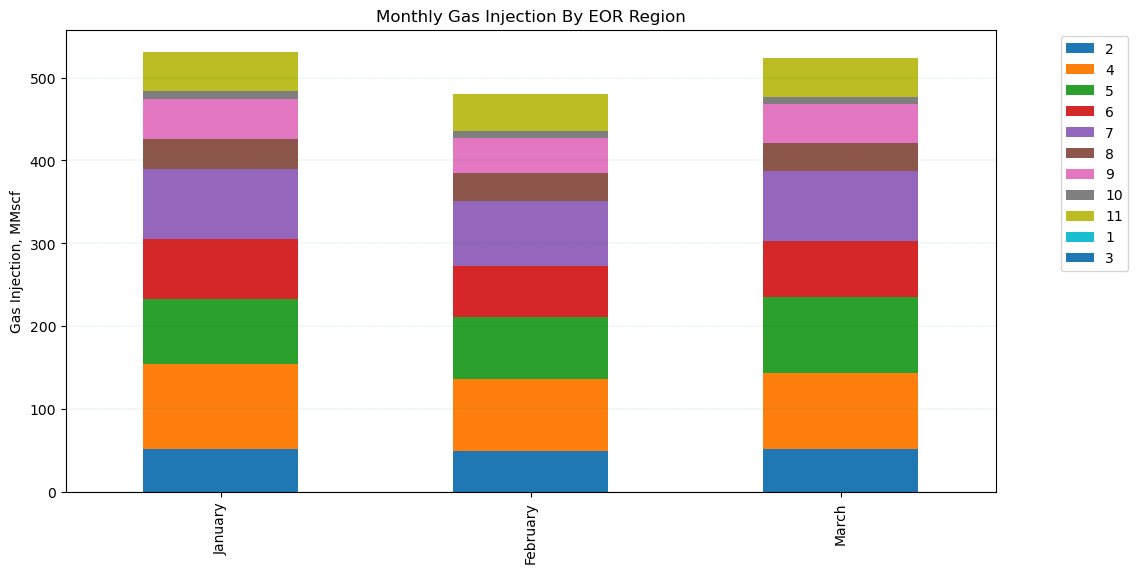

In [234]:
ce = pd.merge(df_Header,dfce[dfce.Date_.between(start_date,end_date)],how='inner',on='Well')
ce = ce[["EOR_Region","Date_","Monthly_Gas_Injection_MMscf"]]
ce = pd.pivot_table(ce[ce.Date_>=start_date],index = "Date_",columns = "EOR_Region", aggfunc = 'sum')
ce.columns = ce.columns.droplevel(0)
for i in range(1,12):
    if i not in list(ce.columns):
        ce[i] = 0
ce[[1,2,3,4,5,6,7,8,9,10,11]]
ce.index = table_index
ce.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Monthly Gas Injection By EOR Region')
plt.ylabel('Gas Injection, MMscf')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.1)
plt.legend(bbox_to_anchor=(1.15, 1))

# Gas Injection per Oil Production

In [235]:
Regional_unit_injection = round(ce * 1e6 / pu,1)
ce_total=ce.sum(axis=1)*1e6
pu_total=pu.sum(axis=1)
ce_pu = round(ce * 1e6 / pu,1)
ce_pu["total"] = ce_pu.sum(axis = 1)
ce_pu["ce_pu_avg"] = ce_total / pu_total
Normalised_unit_injection = round(ce_pu.drop(["total","ce_pu_avg"],axis=1).multiply(ce_pu.ce_pu_avg/ce_pu.total,axis='index'),1)

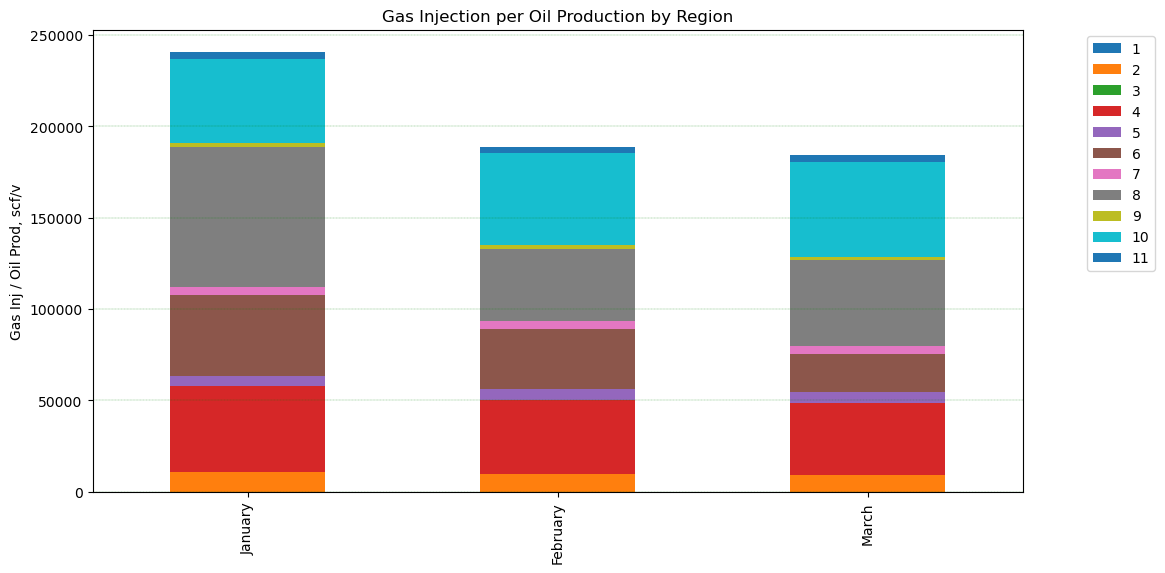

In [236]:
Regional_unit_injection.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Gas Injection per Oil Production by Region')
plt.ylabel('Gas Inj / Oil Prod, scf/v')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.2)
plt.legend(bbox_to_anchor=(1.15, 1))

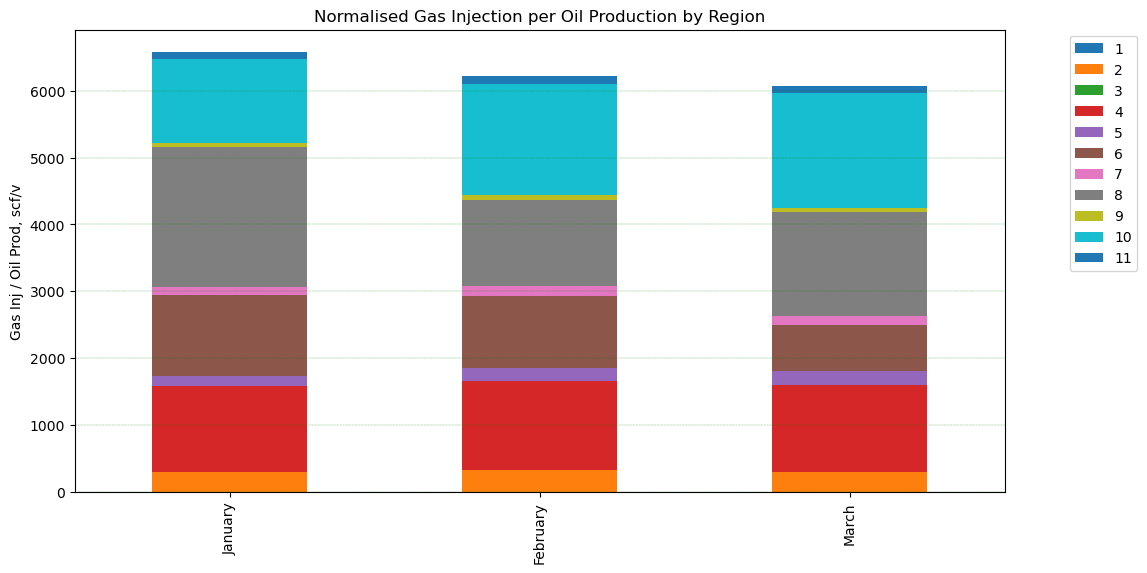

In [237]:
Normalised_unit_injection.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Normalised Gas Injection per Oil Production by Region')
plt.ylabel('Gas Inj / Oil Prod, scf/v')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.2)
plt.legend(bbox_to_anchor=(1.15, 1))

# Injection Table

In [238]:
enj_table = pd.merge(df_Header[['Well','EOR_Region']],dfce[dfce.Date_.between(quarter_start,end_date)][['Well','Date_','Daily_Gas_Injection_MMscf',"Pwh_psi"]]
                     ,how='inner',on='Well')
enj_table.EOR_Region = enj_table.EOR_Region.astype('int')
enj_table = enj_table.drop_duplicates()
enj_table

,Well,EOR_Region,Date_,Daily_Gas_Injection_MMscf,Pwh_psi
0,X-10421,5,1981-03-01,0.63,285.0
1,X-10421,5,1981-02-01,0.66,300.0
2,X-10421,5,1981-01-01,0.65,280.0
3,X-1383,5,1981-03-01,0.64,265.0
4,X-1383,5,1981-02-01,0.69,220.0
...,...,...,...,...,...
104,X-9186,5,1981-02-01,0.62,300.0
105,X-9186,5,1981-01-01,0.65,290.0
106,X-9652,11,1981-03-01,0.26,965.0
107,X-9652,11,1981-02-01,0.29,930.0


In [239]:
df_enj_table = pd.pivot(data = enj_table
                        , index = ['EOR_Region','Well']
                        , columns = 'Date_'
                        , values = ['Daily_Gas_Injection_MMscf','Pwh_psi'])

In [240]:
df_enj_table

Daily_Gas_Injection_MMscf                          Pwh_psi  \
Date_                             1981-01-01 1981-02-01 1981-03-01 1981-01-01   
EOR_Region Well                                                                 
2          X-2220                       0.46       0.49       0.43      800.0   
           X-5423                       0.58       0.58       0.60      500.0   
           X-5861                       0.62       0.62       0.63      420.0   
4          X-3632                       0.22       0.22       0.31      980.0   
           X-41                         0.60       0.56       0.55      455.0   
           X-5658                       0.57       0.56       0.49      600.0   
           X-6333                       0.62       0.58       0.57      395.0   
           X-7147                       0.59       0.52       0.57      440.0   
           X-8761                       0.70       0.56       0.51      340.0   
5          X-10421                      0.65       0.66       0.63      280.0   
           X-1383                       0.67       0.69       0.64      220.0   
           X-4528                       0.59       0.58       0.57      430.0   
           X-5059                        NaN        NaN       0.49        NaN   
           X-9186                       0.65       0.62       0.64      290.0   
6          X-2035                       0.55       0.57       0.49      570.0   
           X-2282                       0.42       0.42       0.42      740.0   
           X-3073                       0.26       0.25       0.25      980.0   
           X-5442                       0.58       0.53       0.52      480.0   
           X-9108                       0.51       0.38       0.49      600.0   
7          X-2375                       0.69       0.65       0.67      250.0   
           X-676                        0.61       0.59       0.57      320.0   
           X-7401                       0.49       0.59       0.60      670.0   
           X-7571                       0.24       0.26       0.22      920.0   
           X-8088                       0.70       0.61       0.66      180.0   
8          X-1499                       0.34       0.35       0.35      890.0   
           X-1602                       0.28       0.27       0.28      955.0   
           X-4269                       0.27       0.29       0.22      895.0   
           X-5802                       0.29       0.25       0.27      950.0   
9          X-2144                       0.50       0.48       0.50      650.0   
           X-2656                       0.40       0.39       0.40      810.0   
           X-5334                       0.29       0.26       0.28      950.0   
           X-7785                       0.37       0.35       0.35      855.0   
10         X-9021                       0.28       0.27       0.28      955.0   
11         X-1514                       0.37       0.38       0.37      860.0   
           X-6867                       0.44       0.42       0.41      760.0   
           X-7033                       0.47       0.45       0.45      700.0   
           X-9652                       0.28       0.29       0.26      965.0   

                                          
Date_              1981-02-01 1981-03-01  
EOR_Region Well                           
2          X-2220       800.0      815.0  
           X-5423       500.0      480.0  
           X-5861       400.0      410.0  
4          X-3632       980.0      885.0  
           X-41         440.0      415.0  
           X-5658       675.0      702.5  
           X-6333       395.0      360.0  
           X-7147       430.0      435.0  
           X-8761       625.0      670.0  
5          X-10421      300.0      285.0  
           X-1383       220.0      265.0  
           X-4528       410.0      440.0  
           X-5059         NaN      180.0  
           X-9186       300.0      267.5  
6          X-2035       445.0      640.0  
    

# Comparison of injection wells by quarter

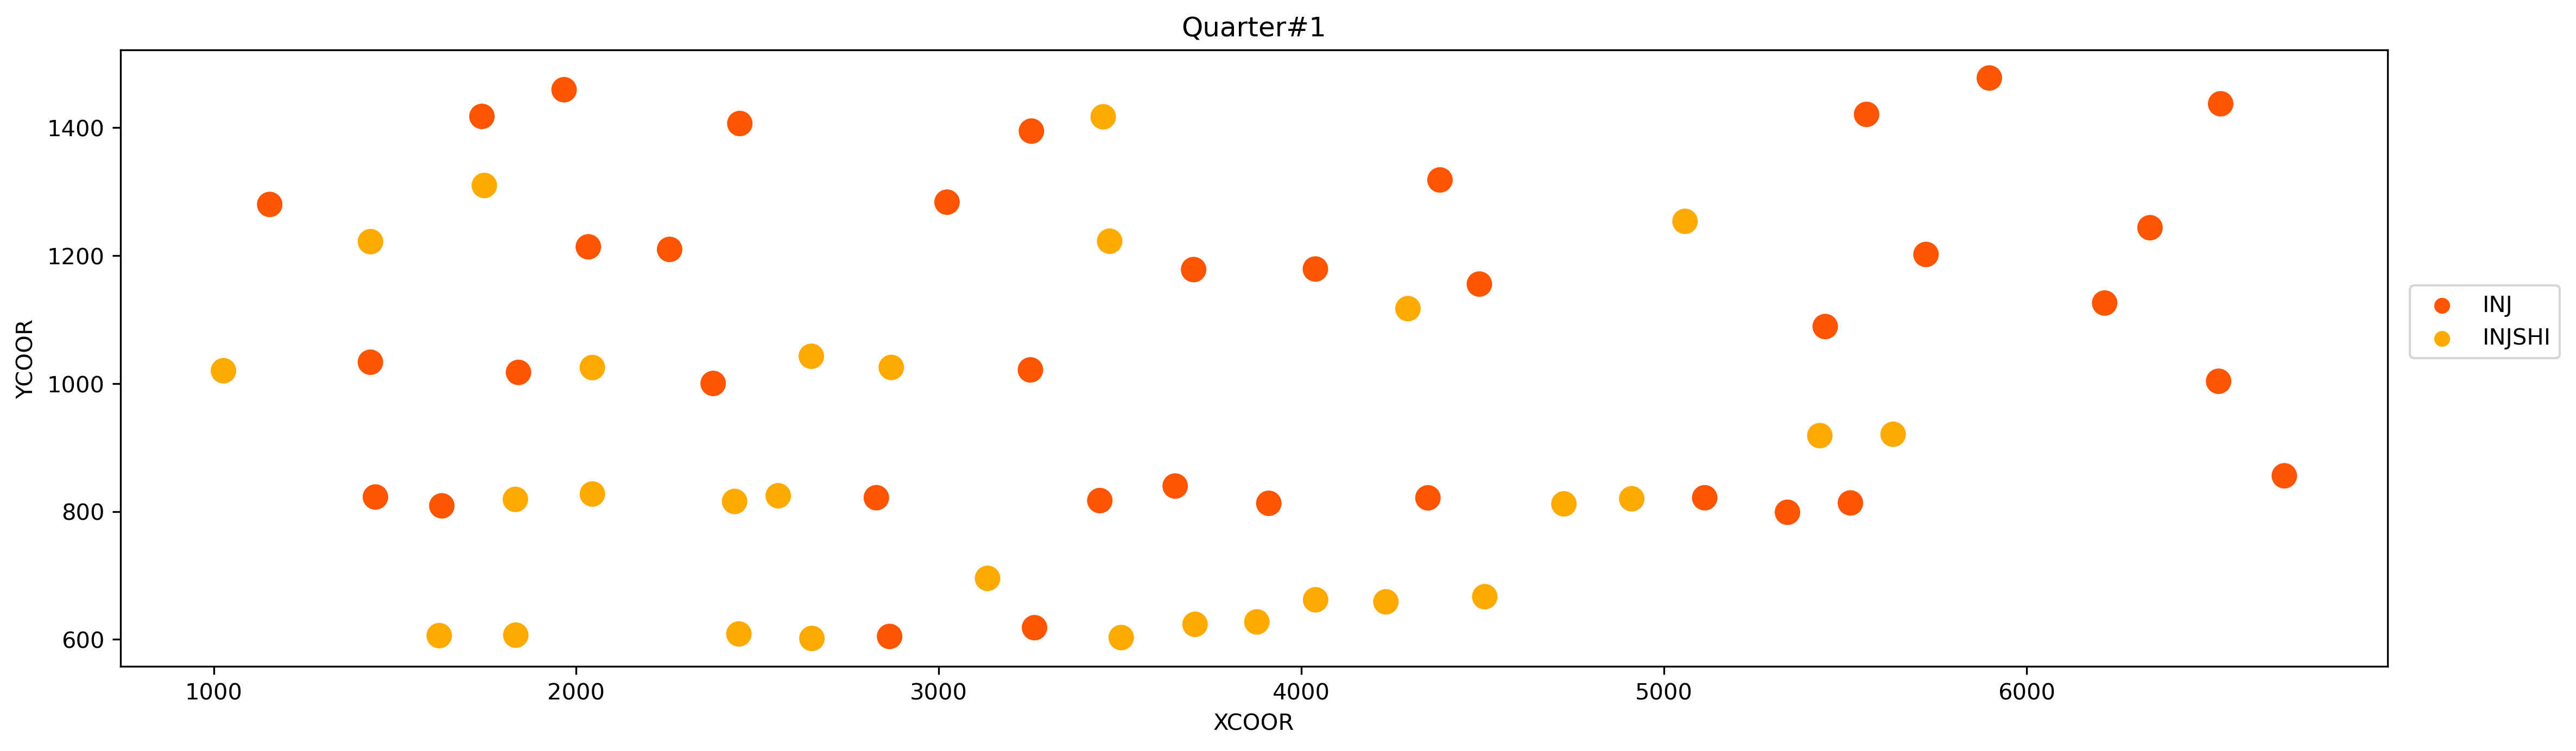

In [241]:

for quarter,date_ in quarter_tuples:
    
    df_CO2_INJ_Well = df_Header[df_Header.Status.isin(['INJ','INJSHI'])]['Well']
    df_inj = pd.DataFrame(data = dfce[dfce.Date_ == date_]['Well'].unique(),columns = ['Well'])
    df_inj['Status'] = 'INJ'
    inj = pd.merge(df_inj,df_CO2_INJ_Well,how='outer',on='Well')
    inj['Status'] = inj.Status.apply(lambda Status: 'INJSHI' if Status != 'INJ' else 'INJ')
    inj = pd.merge(df_Header[['Well','XCOOR','YCOOR']],inj,how='inner',on='Well')

    fig, ax = plt.subplots(figsize=(17.96,4.918),dpi=300)
    ax.set_title('Quarter#' + quarter)
    sns.scatterplot(
                    data = inj, 
                    x='XCOOR',
                    y='YCOOR',
                    hue='Status',
                    hue_order = ("INJ","INJSHI"),
                    s=150,
                    palette = 'autumn'
                    )
    plt.legend(loc = (1.01,0.5))


# Performance Comparison by Quarters

In [242]:
dfu = dfu[dfu.Date_ <=end_date]
dfcu = dfcu[dfcu.Date_ <=end_date]
dfce = dfce[dfce.Date_ <=end_date]
dfse = dfse[dfse.Date_ <=end_date]

In [243]:
dfu_1 = pd.merge(dfu,df_Header[['Well', 'XCOOR', 'YCOOR', 'EOR_Region', 'RF_Region', 'Facility']], how = 'inner', on = 'Well')
dfu_agg = dfu_1[dfu_1.Date_>=start_date].groupby(["EOR_Region","quarter"]).agg({'Monthly_Oil_Production_bbl':'sum'
                                                                        , 'Monthly_Water_Production_bbl' : 'sum'
                                                                        ,'Daily_Oil_Rate_bbl':'mean'
                                                                       , 'WC' : 'mean'
                                                                        , 'Well' : 'count'
                                                                       }).reset_index()
dfu_agg.EOR_Region = dfu_agg.EOR_Region.astype('int');
dfu_agg    


,EOR_Region,quarter,Monthly_Oil_Production_bbl,Monthly_Water_Production_bbl,Daily_Oil_Rate_bbl,WC,Well
0,1,1,10534,1191,20.798889,13.213333,18
1,2,1,15483,13604,15.522778,43.348889,36
2,3,1,1275,801,13.966667,38.493333,3
3,4,1,6699,3675,20.999091,40.379091,11
4,5,1,41513,11900,16.997416,23.588427,89
5,6,1,6751,8623,15.958125,58.248750,16
6,7,1,55505,14117,19.032035,18.538230,113
7,8,1,2073,11084,11.447500,85.812500,8
8,9,1,64805,10570,23.424854,11.705437,103
9,10,1,513,3198,5.640000,86.143333,3


Text(0, 0.5, 'Quarterly Oil Production, bbl')

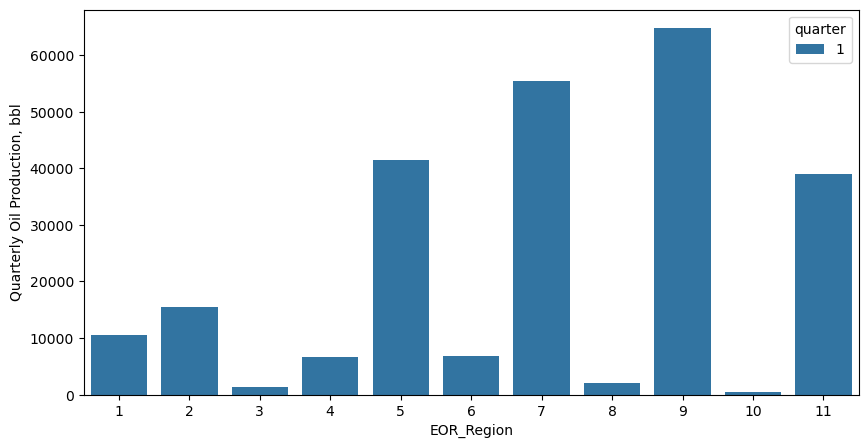

In [244]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfu_agg, x = "EOR_Region", y = 'Monthly_Oil_Production_bbl', hue = "quarter" )
plt.ylabel('Quarterly Oil Production, bbl')

Text(0, 0.5, 'Quarterly Water Production, bbl')

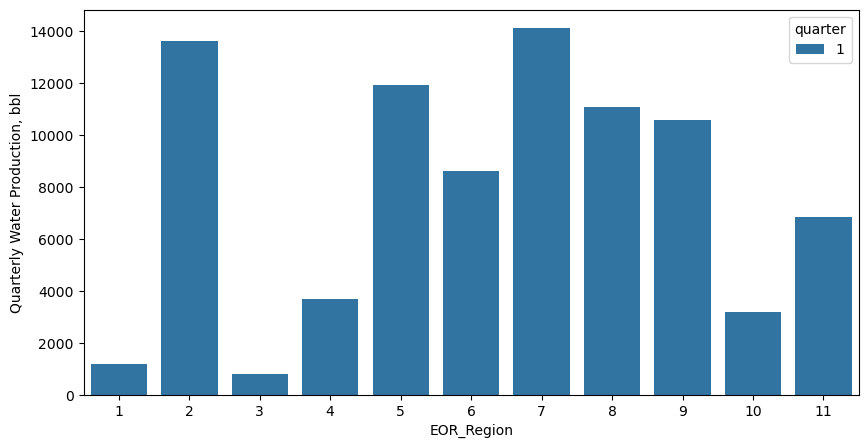

In [245]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfu_agg, x = "EOR_Region", y = 'Monthly_Water_Production_bbl', hue = "quarter" )
plt.ylabel('Quarterly Water Production, bbl')

Text(0, 0.5, 'WC')

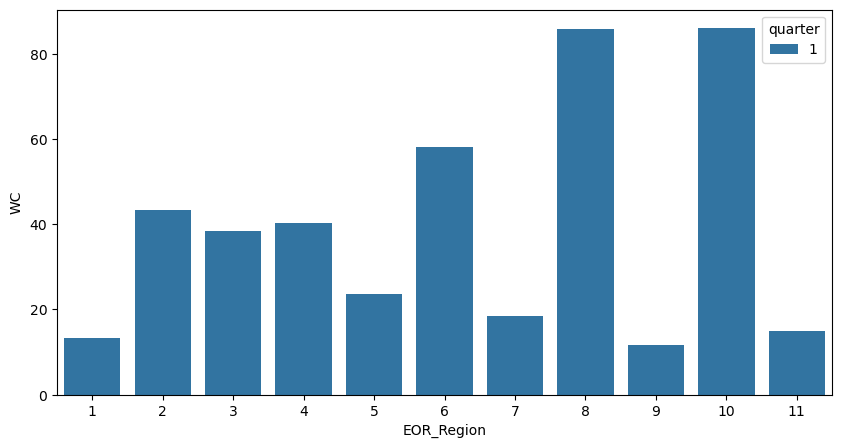

In [246]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfu_agg, x = "EOR_Region", y = 'WC', hue = "quarter" )
plt.ylabel("WC")

In [247]:
dfcu_1 = pd.merge(dfcu,df_Header[['Well', 'XCOOR', 'YCOOR', 'EOR_Region', 'RF_Region', 'Facility']], how = 'inner', on = 'Well')
dfcu_agg = dfcu_1[dfcu_1.Date_>=start_date].groupby(["EOR_Region","quarter"])['Monthly_Gas_Production_Mscf'].sum().reset_index()
dfcu_agg.EOR_Region = dfcu_agg.EOR_Region.astype('int');

Text(0, 0.5, 'Quarterly Gas Production, Mscf')

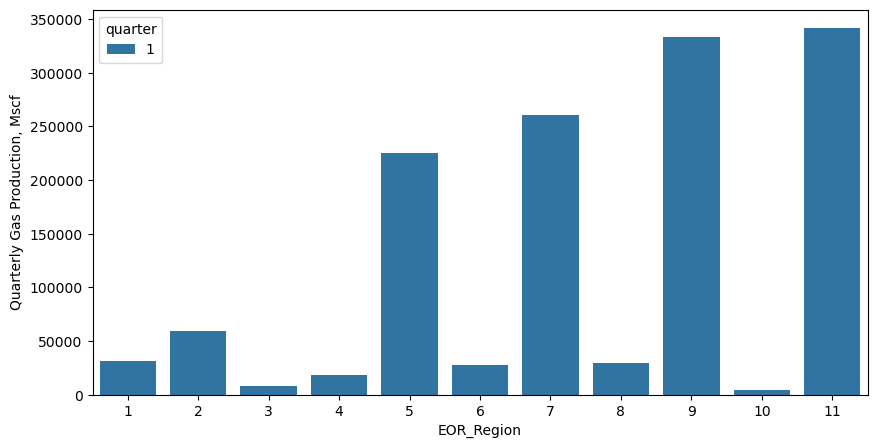

In [248]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfcu_agg, x = "EOR_Region", y = 'Monthly_Gas_Production_Mscf', hue = "quarter" )
plt.ylabel('Quarterly Gas Production, Mscf')

In [249]:
dfce_1 = pd.merge(dfce,df_Header[['Well', 'XCOOR', 'YCOOR', 'EOR_Region', 'RF_Region', 'Facility']], how = 'inner', on = 'Well')
dfce_agg = dfce_1[dfce_1.Date_>=start_date].groupby(["EOR_Region","quarter"])['Monthly_Gas_Injection_MMscf'].sum().reset_index();
dfce_agg.EOR_Region = dfce_agg.EOR_Region.astype('int');

Text(0, 0.5, 'Quarterly Gas Injection, MMscf')

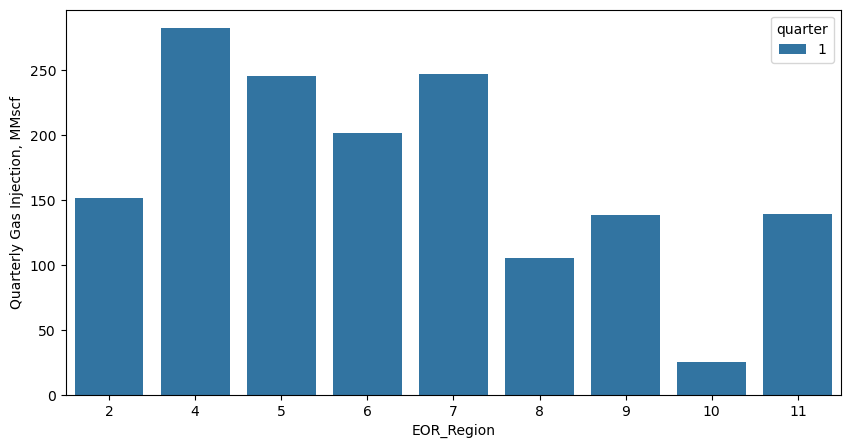

In [250]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfce_agg, x = "EOR_Region", y = 'Monthly_Gas_Injection_MMscf', hue = "quarter" )
plt.ylabel('Quarterly Gas Injection, MMscf')

In [251]:
dfse_1 = pd.merge(dfse,df_Header[['Well', 'XCOOR', 'YCOOR', 'EOR_Region', 'RF_Region', 'Facility']], how = 'inner', on = 'Well')
dfse_agg = dfse_1[dfse_1.Date_ >= start_date].groupby(["EOR_Region","quarter"])['Monthly_Water_Injection_bbl'].sum().reset_index();
dfse_agg.EOR_Region = dfse_agg.EOR_Region.astype('int');

Text(0, 0.5, 'Quarterly Water Injection, bbl')

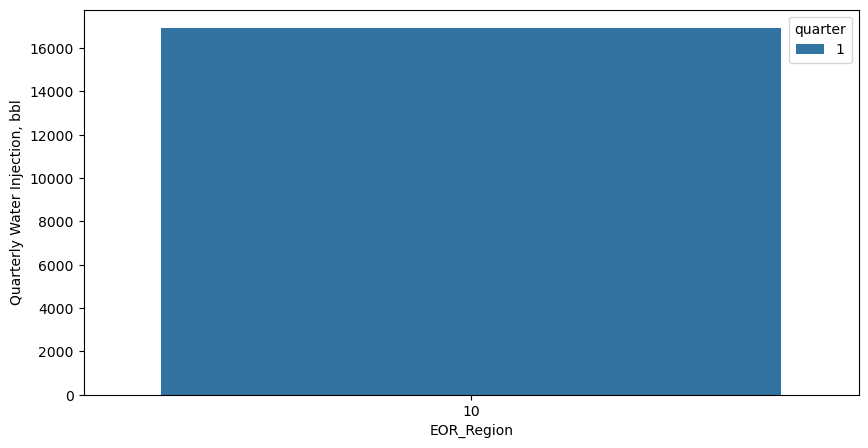

In [252]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfse_agg, x = "EOR_Region", y = 'Monthly_Water_Injection_bbl', hue = "quarter" )
plt.ylabel('Quarterly Water Injection, bbl')

# Exploratory Data Aanalysis for the last month

In [3]:
dfu.columns

Index(['Well', 'Date_', 'Work_Days', 'Monthly_Oil_Production_bbl',
       'Monthly_Water_Production_bbl', 'Daily_Oil_Rate_bbl', 'WC',
       'Average_API', 'Pump_Type', 'month', 'year', 'days_in_month',
       'quarter'],
      dtype='object')

In [8]:
dfu.Date_.max()

Timestamp('1981-08-01 00:00:00')

<Axes: xlabel='Daily_Oil_Rate_bbl', ylabel='Count'>

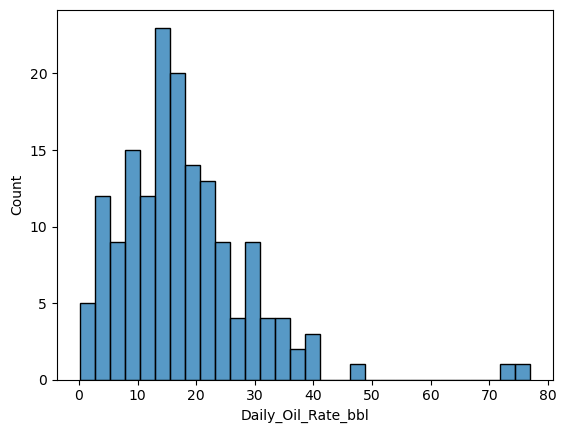

In [9]:
sns.histplot(data = dfu[dfu.Date_== '1981-08-01'],x = 'Daily_Oil_Rate_bbl',bins = 30)

<Axes: xlabel='WC', ylabel='Count'>

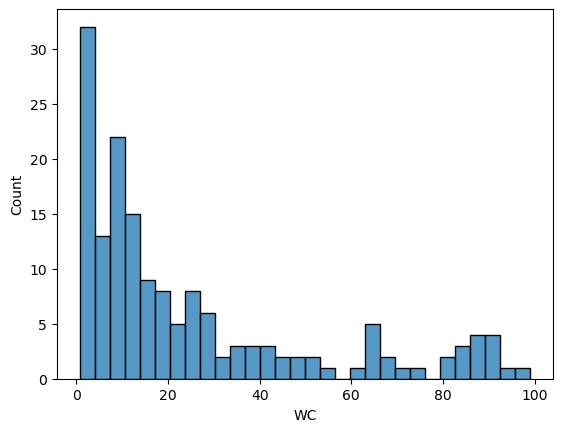

In [10]:
sns.histplot(data = dfu[dfu.Date_== '1981-08-01'],x = 'WC',bins = 30)

In [11]:
dfcu.columns

Index(['Well', 'Date_', 'Monthly_Gas_Production_Mscf',
       'Monthly_Water_Production_bbl', 'Daily_Gas_Production_Mscf', 'Pwh_psi',
       'Work_Days', 'Notes', 'month', 'year', 'quarter'],
      dtype='object')

<Axes: xlabel='Monthly_Gas_Production_Mscf', ylabel='Count'>

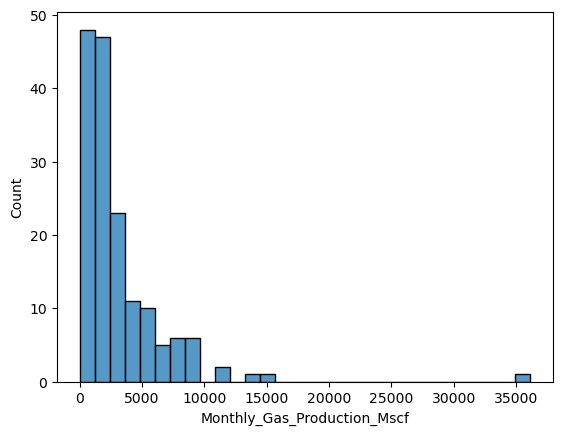

In [12]:
sns.histplot(data = dfcu[dfcu.Date_== '1981-08-01'],x = 'Monthly_Gas_Production_Mscf',bins = 30)

In [14]:
dfcu[(dfcu.Date_ == '1981-08-01') & (dfcu.Monthly_Gas_Production_Mscf > 34000)]

,Well,Date_,Monthly_Gas_Production_Mscf,Monthly_Water_Production_bbl,Daily_Gas_Production_Mscf,Pwh_psi,Work_Days,Notes,month,year,quarter
82,X-4755,1981-08-01,36160.1,125.0,1166.8,NaN,30.99,NaN,8,1981,3


In [18]:
df_Header[df_Header.Well == 'X-4755']

,Well,XCOOR,YCOOR,EOR_Region,RF_Region,Facility,Status
159,X-4755,5818.534091,1256.139167,11,dogu,F5,URT


In [19]:
dfce.columns

Index(['Well', 'Date_', 'Monthly_Gas_Injection_MMscf',
       'Daily_Gas_Injection_MMscf', 'Pwh_psi', 'Twh_C', 'Work_Days', 'Notes',
       'month', 'year', 'quarter'],
      dtype='object')

In [21]:
dfce["Monthly_Gas_Injection_scf"] = dfce.Monthly_Gas_Injection_MMscf*1e6

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


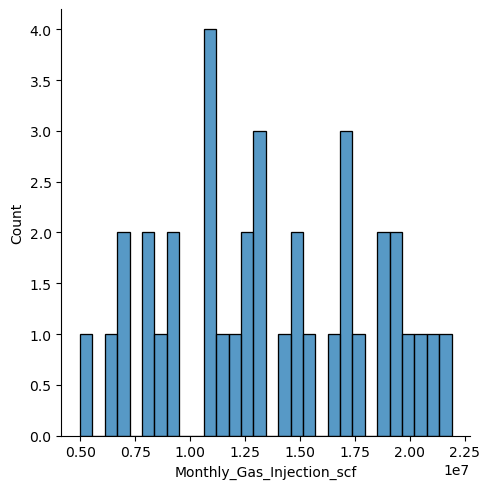

In [26]:
sns.displot(data = dfce[dfce.Date_== '1981-08-01'],x = 'Monthly_Gas_Injection_scf',bins = 30)